<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/book1/intro/colab_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to colab

Colab is Google's version of Jupyter notebooks, but has the following advantages:
- it runs in the cloud, not locally, so you can use it from a cheap laptop, such as a Chromebook. 
- The notebook is saved in your Google drive, so you can share your notebook with someone else and work on it collaboratively.
- it has nearly all of the packages you need for doing ML pre-installed
- it gives you free access to GPUs
- it has a [file editor](https://colab.research.google.com/drive/1lW1mdgXVqQ5TMjIDi7PCnAYJv5Tmcp5x#scrollTo=DdXlYCe1AlJa&uniqifier=2), so you can separate your code from the output of your code, as with other IDEs, such as [Jupyter lab](https://jupyterlab.readthedocs.io/en/stable/).
- it has various other useful features, such as collapsible sections (cf. code folding), and ways to specify parameters to your functions via [various GUI widgets](https://colab.research.google.com/notebooks/forms.ipynb) for use by non-programmers. (You can automatically execute  parameterized notebooks with different parameters using [papermill](https://papermill.readthedocs.io/en/latest/).)

More details can be found in the [official introduction](https://colab.research.google.com/notebooks/intro.ipynb). Below we describe a few more tips and tricks, focusing on methods that I have found useful when developing the book. (More advanced tricks can be found in [this blog post](https://medium.com/@robertbracco1/configuring-google-colab-like-a-pro-d61c253f7573#4cf4).)


In [1]:
IS_COLAB = ('google.colab' in str(get_ipython()))
print(IS_COLAB)


True


In [2]:
# Standard Python libraries
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import time
import glob

from typing import Any, Callable, Dict, Iterator, Mapping, Optional, Sequence, Tuple

# How to import and use standard libraries

Colab comes with most of the packages we need pre-installed. 
You can see them all using this command.





In [ ]:
!pip list -v 

Package                       Version         Location                               Installer
----------------------------- --------------- -------------------------------------- ---------
absl-py                       0.10.0          /usr/local/lib/python3.6/dist-packages pip      
alabaster                     0.7.12          /usr/local/lib/python3.6/dist-packages pip      
albumentations                0.1.12          /usr/local/lib/python3.6/dist-packages pip      
altair                        4.1.0           /usr/local/lib/python3.6/dist-packages pip      
argon2-cffi                   20.1.0          /usr/local/lib/python3.6/dist-packages pip      
asgiref                       3.3.1           /usr/local/lib/python3.6/dist-packages pip      
astor                         0.8.1           /usr/local/lib/python3.6/dist-packages pip      
astropy                       4.1             /usr/local/lib/python3.6/dist-packages pip      
astunparse                    1.6.3           /usr

To install a new package called 'foo', use the following (see [this page](https://colab.research.google.com/notebooks/snippets/importing_libraries.ipynb) for details):

```
!pip install foo
```



## Numpy

In [ ]:
import numpy as np
np.set_printoptions(precision=3)

A = np.random.randn(2,3)
print(A)

[[0.414 1.496 0.64 ]
 [0.953 1.708 0.251]]


## Pandas

In [ ]:
import pandas as pd
pd.set_option('precision', 2) # 2 decimal places
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 100) # wide windows

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Year', 'Origin', 'Name']
df = pd.read_csv(url, names=column_names, sep='\s+', na_values="?")

df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Sklearn

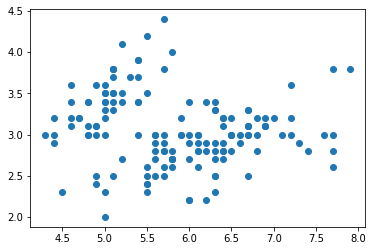

In [ ]:
import sklearn

from sklearn.datasets import load_iris
iris = load_iris()
# Extract numpy arrays
X = iris.data 
y = iris.target

import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])

## JAX

In [ ]:
# JAX (https://github.com/google/jax)

import jax
import jax.numpy as jnp
A = jnp.zeros((3,3))

# Check if JAX is using GPU
print("jax backend {}".format(jax.lib.xla_bridge.get_backend().platform))

jax backend gpu


## Tensorflow

In [ ]:

import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

print("tf version {}".format(tf.__version__))
print([d for d in tf.config.list_physical_devices()])

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. DNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

tf version 2.4.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## PyTorch

In [ ]:

import torch
import torchvision
print("torch version {}".format(torch.__version__))
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))
else:
    print("Torch cannot find GPU")

torch version 1.7.0+cu101
Tesla T4


# Plotting

Colab has excellent support for plotting. We give some examples below.

## Static plots

Colab lets you make static plots using matplotlib, as shown below.
Note that plots are displayed inline by default, so
```
%matplotlib inline
```
is not needed.


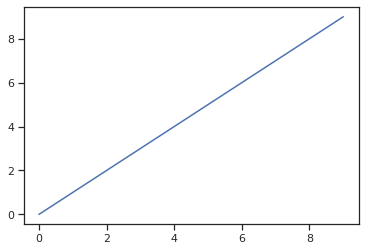

In [ ]:
import matplotlib.pyplot as plt
import PIL
import imageio
import seaborn as sns;
sns.set(style="ticks", color_codes=True)

from IPython import display

plt.figure()
plt.plot(range(10))
plt.savefig('myplot.png')

## Interactive plots

Colab also lets you create interactive plots using various javascript libraries - see [here](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=QSMmdrrVLZ-N) for details.

Below we illustrate how to use the [bokeh library](https://docs.bokeh.org/en/latest/index.html) to create an interactive plot of a  pandas time series, where if you mouse over the plot, it shows the corresponding (x,y) coordinates. (Another option is [plotly](https://plotly.com/graphing-libraries/).)

In [3]:
import pandas as pd
import numpy as np
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool

# Call once to configure Bokeh to display plots inline in the notebook.
output_notebook()


In [ ]:



np.random.seed(0)
dates = pd.date_range(start='2018-04-24', end='2018-08-27')
N = len(dates)
vals = np.random.standard_t(1, size=N)
dd = pd.DataFrame({'vals': vals, 'dates': dates}, index=dates)
dd['days'] = dd.dates.dt.strftime("%Y-%m-%d")


source = ColumnDataSource(dd)
hover = HoverTool(tooltips=[("Date", "@days"),
                            ("vals", "@vals")],
)
p = figure( x_axis_type="datetime")
p.line(x='dates', y='vals', source=source)
p.add_tools(hover)
show(p)

When you mouse over a point, you should see something like the screenshot below.


<img height="500" src="
https://github.com/probml/pyprobml/blob/master/book1/intro/figures/bokeh-timeseries.png?raw=true">


We can also make plots that can you pan and zoom into.

In [4]:
N = 4000
np.random.seed(0)
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = ["#%02x%02x%02x" % (r, g, 150) for r, g in zip(np.floor(50+2*x).astype(int), np.floor(30+2*y).astype(int))]

p = figure()
p.circle(x, y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)
show(p)

## Graphviz

You can use graphviz to layout nodes of a graph and draw the structure.

In [ ]:
!apt-get -y install python-pydot
!apt-get -y install python-pydot-ng
!apt-get -y install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  python-pyparsing
Suggested packages:
  python-pyparsing-doc
The following NEW packages will be installed:
  python-pydot python-pyparsing
0 upgraded, 2 newly installed, 0 to remove and 13 not upgraded.
Need to get 71.7 kB of archives.
After this operation, 347 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-pyparsing all 2.2.0+dfsg1-2 [52.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-pydot all 1.2.3-1 [19.6 kB]
Fetched 71.7 kB in 0s (891 kB/s)
Selecting previously unselected package python-pyparsing.
(Reading database ... 146374 files and directories currently installed.)
Preparing to unpack .../python-pyparsing_2.2.0+dfsg1-2_all.deb ...
Unpacking python-pyparsing (2.2.0+dfsg1-2) ...
Selecting previously unselected package python-pydot.
Preparing to unp

// Bayes net
digraph {
}
// Bayes net
digraph {
	C [label=Cloudy]
	R [label=Rain]
	S [label=Sprinkler]
	W [label="Wet grass"]
	C -> R
	C -> S
	R -> W
	S -> W
}


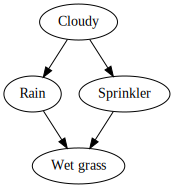

In [ ]:
from graphviz import Digraph
dot = Digraph(comment='Bayes net')
print(dot)
dot.node('C', 'Cloudy')
dot.node('R', 'Rain')
dot.node('S', 'Sprinkler')
dot.node('W', 'Wet grass')
dot.edge('C', 'R')
dot.edge('C', 'S')
dot.edge('R', 'W')
dot.edge('S', 'W')
print(dot.source) 
dot.render('test-output/graph.jpg', view=True)
dot

## Progress bar


In [ ]:
! pip install fastprogress
from fastprogress import master_bar, progress_bar

In [ ]:
my_list = np.arange(0,100)
N = 1000
for item in progress_bar(my_list):
    np.dot(np.ones((N,N)), np.ones((N,N))) 


# Filing system issues


## Accessing local files

Clicking on the file folder icon on the left hand side of colab lets you browse local files. Right clicking on a filename lets you download it to your local machine. Double clicking on a file will open it in the file viewer/ editor, which appears on the right hand side. 

The result should look something like this:

<img src="https://github.com/probml/pyprobml/blob/
master/book1/intro/figures/colab-image-viewer.png?raw=true">


You can also use standard unix commands to manipulate files, as we show below.

In [ ]:
!pwd

/content


In [ ]:
!ls

myplot.png  sample_data


In [ ]:
!echo 'foo bar' > foo.txt
!cat foo.txt

foo bar


You can open text files in the editor by clicking on their filename in the file browser, or programmatically as shown below.

In [ ]:
from google.colab import files
files.view('foo.txt')

<IPython.core.display.Javascript object>

If you make changes to a file containing code, the new version of the file will not be noticed unless you use the magic below.

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Syncing with Google drive

Files that you generate in, or upload to, colab are ephemeral, since colab is a temporary environment with an idle timeout of 90 minutes and an absolute timeout of 12 hours (24 hours for Colab pro). To save any files permanently, you need to mount your google drive folder as we show below. (Executing this command will open a new window in your browser - you need cut and paste the password that is shown into the prompt box.)



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!pwd

with open('/content/gdrive/MyDrive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/gdrive/MyDrive/foo.txt

Mounted at /content/gdrive
/content
Hello Google Drive!

To ensure that local changes are detected by colab, use this piece of magic.

In [ ]:
%load_ext autoreload
%autoreload 2

## Downloading data

You can use [wget](https://www.pair.com/support/kb/paircloud-downloading-files-with-wget/) 



In [ ]:
!pwd

/content


In [ ]:
!rm timemachine.*

In [ ]:

#!wget  https://github.com/probml/pyprobml/blob/master/data/timemachine.txt

!wget https://raw.githubusercontent.com/probml/pyprobml/master/data/timemachine.txt

--2021-01-22 05:41:58--  https://raw.githubusercontent.com/probml/pyprobml/master/data/timemachine.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178887 (175K) [text/plain]
Saving to: ‘timemachine.txt’

timemachine.txt     100%[===================>] 174.69K  --.-KB/s    in 0.009s  

2021-01-22 05:41:58 (18.4 MB/s) - ‘timemachine.txt’ saved [178887/178887]



In [ ]:
!head timemachine.txt

The Time Machine, by H. G. Wells [1898]

I

The Time Traveller (for so it will be convenient to speak of him) was expounding a recondite matter to us. His grey eyes shone and twinkled, and his usually pale face was flushed and animated. The fire burned brightly, and the soft radiance of the incandescent lights in the lilies of silver caught the bubbles that flashed and passed in our glasses. Our chairs, being his patents, embraced and caressed us rather than submitted to be sat upon, and there was that luxurious after-dinner atmosphere when thought roams gracefully free of the trammels of precision. And he put it to us in this way--marking the points with a lean forefinger--as we sat and lazily admired his earnestness over this new paradox (as we thought it) and his fecundity.

'You must follow me carefully. I shall have to controvert one or two ideas that are almost universally accepted. The geometry, for instance, they taught you at school is founded on a misconception.'

'Is not tha

# Working with github

It is possible to download code (or data) from githib into a local directory on this virtual machine.  It is also possible to upload local files back to github, although that is more complex. See details below.

## Cloning a repo from github

You can clone a public github repo into your local colab VM, as we show below,
using the repo for this book as an example.
(To clone a private repo, you need to specify your password,
as explained [here](https://medium.com/@robertbracco1/configuring-google-colab-like-a-pro-d61c253f7573#6b70). Alternatively you can use the ssh method we describe below.)

In [ ]:

!rm -rf pyprobml # Remove any old local directory to ensure fresh install
!git clone https://github.com/probml/pyprobml


Cloning into 'pyprobml'...
remote: Enumerating objects: 190, done.
remote: Counting objects: 100% (190/190), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 5905 (delta 114), reused 100 (delta 55), pack-reused 5715
Receiving objects: 100% (5905/5905), 201.01 MiB | 24.86 MiB/s, done.
Resolving deltas: 100% (3362/3362), done.


In [ ]:
!ls

pyprobml  sample_data


We can access data as shown below.

In [ ]:

datadir = 'pyprobml/data'
import re
fname = os.path.join(datadir, 'timemachine.txt')
with open(fname, 'r') as f:
    lines = f.readlines()
    sentences = [re.sub('[^A-Za-z]+', ' ', st).lower().split()
                   for st in lines]
for  i in range(5):
  words = sentences[i]
  print(words)

['the', 'time', 'machine', 'by', 'h', 'g', 'wells']
[]
['i']
[]
['the', 'time', 'traveller', 'for', 'so', 'it', 'will', 'be', 'convenient', 'to', 'speak', 'of', 'him', 'was', 'expounding', 'a', 'recondite', 'matter', 'to', 'us', 'his', 'grey', 'eyes', 'shone', 'and', 'twinkled', 'and', 'his', 'usually', 'pale', 'face', 'was', 'flushed', 'and', 'animated', 'the', 'fire', 'burned', 'brightly', 'and', 'the', 'soft', 'radiance', 'of', 'the', 'incandescent', 'lights', 'in', 'the', 'lilies', 'of', 'silver', 'caught', 'the', 'bubbles', 'that', 'flashed', 'and', 'passed', 'in', 'our', 'glasses', 'our', 'chairs', 'being', 'his', 'patents', 'embraced', 'and', 'caressed', 'us', 'rather', 'than', 'submitted', 'to', 'be', 'sat', 'upon', 'and', 'there', 'was', 'that', 'luxurious', 'after', 'dinner', 'atmosphere', 'when', 'thought', 'roams', 'gracefully', 'free', 'of', 'the', 'trammels', 'of', 'precision', 'and', 'he', 'put', 'it', 'to', 'us', 'in', 'this', 'way', 'marking', 'the', 'points', 'with', 

We can run any script as shown below.
(Note we first have to define the environment variable for where the figures will be stored.)

plot some activation functions


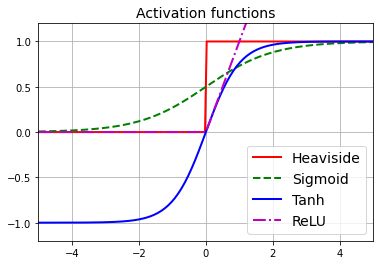

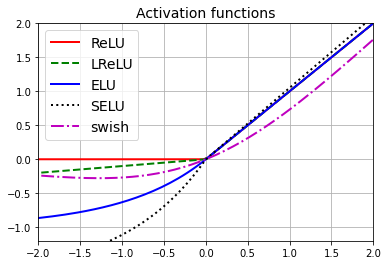

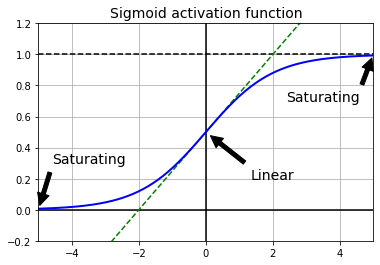

In [ ]:
import os
os.environ['PYPROBML']='pyprobml'

%run pyprobml/scripts/activation_fun_plot.py

We can also import code, as we show below.

In [ ]:
!ls

pyprobml  sample_data


In [ ]:

import pyprobml.scripts.probml_tools as pml
pml.test()

welcome to python probabilistic ML library


## Pushing local files back to github

You can easily save your entire colab notebook to github by choosing 'Save a copy in github' under the File menu in the top left. But if you want to save individual files (eg code that you edited in the colab file editor, or a bunch of images or data files you created), the process is more complex.

There are two main methods. You can either specify your username and password every time, as explained [here](https://medium.com/@robertbracco1/configuring-google-colab-like-a-pro-d61c253f7573#6b70). Or you can authenticate via ssh. We explain the latter method here.

You first need to do some setup to create SSH keys on your current colab VM (virtual machine), manually add the keys to your github account, and then copy the keys to your mounted google drive so you can reuse the same keys in the future. This only has to be done once.

After setup, you can use the `git_ssh` function we define below to securely execute git commands. This works by copying your SSH keys from your google drive to the current colab VM, executing the git command, and then deleting the keys from the VM for safety. 


### Setup

Follow these steps. (These instructions are text, not code, since they require user interaction.)

```
!ssh-keygen -t rsa -b 4096
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts
!cat /root/.ssh/id_rsa.pub
```
The cat command will display your public key in the colab window.
Cut and paste this and manually add to your github account following [these instructions](https://github.com/settings/keys).

Test it worked
```
!ssh -T git@github.com
```

Finally, save the generated keys to your Google drive

```
from google.colab import drive
drive.mount('/content/drive')
!mkdir /content/drive/MyDrive/ssh/
!cp  -r  ~/.ssh/* /content/drive/MyDrive/ssh/
!ls /content/drive/MyDrive/ssh/
```


### Test previous setup

Let us check that we can see our SSH keys in our mounted google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!ls /content/drive/MyDrive/ssh/



Mounted at /content/drive
id_rsa	id_rsa.pub  known_hosts


### Executing git commands from colab via SSH

The following function lets you securely doing a git command via SSH.
It copies the keys from your google drive to the local VM, excecutes the command, then removes the keys.



In [ ]:
!rm -rf probml_tools.py # remove any old copies of this file
!wget https://raw.githubusercontent.com/probml/pyprobml/master/scripts/probml_tools.py  

--2021-01-22 20:22:03--  https://raw.githubusercontent.com/probml/pyprobml/master/scripts/probml_tools.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1882 (1.8K) [text/plain]
Saving to: ‘probml_tools.py’

probml_tools.py     100%[===================>]   1.84K  --.-KB/s    in 0s      

2021-01-22 20:22:03 (34.6 MB/s) - ‘probml_tools.py’ saved [1882/1882]



Below we show how to use this. We first clone the repo to this colab VM.

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # must do this before running git_colab

import probml_tools as pml

!rm -rf pyprobml # remove any old copies of this directory
#!git clone https://github.com/probml/pyprobml.git # clones using wrong credentials
pml.git_ssh("git clone https://github.com/probml/pyprobml.git") # clone using your credentials



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
executing command via ssh: git clone git@github.com:probml/pyprobml.git


Next we add a file and push it to github.


In [ ]:
!pwd
!ls

# To add stuff to github, you must be inside the git directory
%cd /content/pyprobml
!echo 'this is a test' > scripts/foo.txt
pml.git_ssh("git add scripts; git commit -m 'push from colab'; git push")
%cd /content

/content
drive  probml_tools.py	__pycache__  pyprobml  sample_data
/content/pyprobml
executing command via ssh: git add scripts; git commit -m 'push from colab'; git push
/content


[Here](https://github.com/probml/pyprobml/blob/master/scripts/foo.txt) is a link to the file we just pushed.

Finally we clean up our mess.

In [ ]:

%cd /content/pyprobml
pml.git_ssh("git rm scripts/foo*.txt; git commit -m 'colab cleanup'; git push")
%cd /content

/content/pyprobml
executing command via ssh: git rm scripts/foo*.txt; git commit -m 'colab cleanup'; git push
/content


# Software engineering tools

 [Joel Grus has argued](https://docs.google.com/presentation/d/1n2RlMdmv1p25Xy5thJUhkKGvjtV-dkAIsUXP-AL4ffI/edit) that notebooks are bad for developing complex software, because they encourage creating monolithic notebooks instead of factoring out code into separate, well-tested files. 
 
[Jeremy Howard has responded to Joel's critiques here](https://www.youtube.com/watch?v=9Q6sLbz37gk&feature=youtu.be). In particular, the FastAI organization has created [nbdev](https://github.com/fastai/nbdev) which has various tools that make notebooks more useful.



## Avoiding problems with global state

One of the main drawbacks of colab is that all variables are globally visible, so you may accidently write a function that depends on the current state of the notebook, but which is not passed in as an argument. Such a function may fail if used in a different context.

One solution to this is to put most of your code in files, and then have the notebook simply import the code and run it, like you would from the command line. Then you can always run the notebook from scratch, to ensure consistency.

Another solution is to use the [localscope](https://localscope.readthedocs.io/en/latest/README.html) package can catch some of these errors.




In [ ]:
!pip install localscope


  Created wheel for localscope: filename=localscope-0.1.3-cp36-none-any.whl size=4068 sha256=7a5d6718e16dbff82fe94e1229d233a19ef52280ff0d4fc48ef62a2ba41d5855
  Stored in directory: /root/.cache/pip/wheels/89/57/33/ce153d31de05d74323324df0f45a08ea99e92300e549da5154
Successfully built localscope


In [ ]:
from localscope import localscope

In [ ]:
a = 'hello world'
def myfun():
   print(a) # silently accesses global variable

myfun()

hello world


In [ ]:
a = 'hello world'
@localscope
def myfun():
  print(a)

myfun()

ValueError: ignored

In [ ]:
def myfun2():
  return 42

@localscope
def myfun3():
  return myfun2()

  

ValueError: ignored

In [ ]:
@localscope.mfc # allow for global methods, functions, classes
def myfun4():
  return myfun2()

myfun4()

42

## Factoring out functionality into files stored on github

The recommended workflow is to  develop your code in the colab in the usual way, and when it is working, to factor out the core code into separate files. You can  edit these files locally in the colab editor, and then push the code to github when ready (see details above). To run functions defined in a local file, just import them. For example, suppose we have created the file /content/pyprobml/scripts/fit_flax.py; we  can use this idiom to run its test suite:
```
import pyprobml.scripts.fit_flax as ff
ff.test()
```
If you make local edits, you want to be sure
 that you always import the latest version of the file (not a cached version). So you need to use this piece of colab magic first:
```
%load_ext autoreload
%autoreload 2
```



## File editors

Colab has a simple file editor, illustrated below for an example file.
This lets you separate your code from the output of your code, as with other IDEs, such as [Jupyter lab](https://jupyterlab.readthedocs.io/en/stable/).


<img src="https://github.com/probml/pyprobml/blob/
master/book1/intro/figures/colab-file-editor.png?raw=true">



## VScode
The default colab file editor is very primitive.
See [this article](https://amitness.com/vscode-on-colab/) for how to run VScode
from inside your Colab browser. Unfortunately this is a bit slow. It is also possible to run VScode locally on your laptop, and have it connect to colab via SSH, but this is more complex (see [this medium post](https://medium.com/@robertbracco1/configuring-google-colab-like-a-pro-d61c253f7573#4cf4) for details).


# Hardware accelerators

By default, Colab runs on a CPU, but you can select GPU or TPU for extra speed, as we show below. To get access to more powerful machines (with faster processors, more memory, and longer idle timeouts), you can subscript to [Colab Pro](https://colab.research.google.com/signup). At the time of writing (Jan 2021), the cost is $10/month (USD). This is a good deal if you use GPUs a lot. 


## CPUs

To see what devices you have, use this command.


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12564556295328712695, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15692777408
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6192511611231741902
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [ ]:
!cat /proc/version

Linux version 4.19.112+ (builder@a12462ca91c8) (Chromium OS 10.0_pre377782_p20200113-r10 clang version 10.0.0 (/var/cache/chromeos-cache/distfiles/host/egit-src/llvm-project 4e8231b5cf0f5f62c7a51a857e29f5be5cb55734)) #1 SMP Thu Jul 23 08:00:38 PDT 2020


In [ ]:
from psutil import cpu_count

print('num cores', cpu_count())

!cat /proc/cpuinfo


num cores 4
processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.000
cache size	: 56320 KB
physical id	: 0
siblings	: 4
core id		: 0
cpu cores	: 2
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4400.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits ph

## Memory


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('RAM (GB)', ram_gb)


RAM (GB) 27.393818624


In [ ]:

!cat /proc/meminfo

MemTotal:       26751776 kB
MemFree:        23653276 kB
MemAvailable:   25773356 kB
Buffers:          109276 kB
Cached:          2230616 kB
SwapCached:            0 kB
Active:           756592 kB
Inactive:        1980036 kB
Active(anon):     363548 kB
Inactive(anon):      416 kB
Active(file):     393044 kB
Inactive(file):  1979620 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               392 kB
Writeback:             0 kB
AnonPages:        396824 kB
Mapped:           212400 kB
Shmem:              1032 kB
Slab:             201364 kB
SReclaimable:     140252 kB
SUnreclaim:        61112 kB
KernelStack:        4528 kB
PageTables:         5336 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:    13375888 kB
Committed_AS:    3257684 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:             2096 kB
AnonHugePages:   

## GPUs

If you select the 'Runtime' menu at top left, and then select 'Change runtime type' and then select 'GPU', you can get free access to a GPU. 


<img src="https://github.com/probml/pyprobml/blob/
master/book1/intro/figures/colab-change-runtime.png?raw=true" height=300>
<img src="https://github.com/probml/pyprobml/blob/
master/book1/intro/figures/colab-select-gpu.png?raw=true" height=200>




To see what kind of GPU you are using, see below.


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
print(gpu_info)

Tue Jan 19 23:05:41 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!grep Model: /proc/driver/nvidia/gpus/*/information | awk '{$1="";print$0}'

 Tesla P100-PCIE-16GB


# Using Julia in colab

See [this colab](https://colab.research.google.com/github/ageron/julia_notebooks/blob/master/Julia_Colab_Notebook_Template.ipynb)